In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy import stats

In [299]:
dfx = pd.read_csv("healthdata.csv")
dfy = pd.read_csv("healthdata.csv")
dfo = pd.read_csv("healthdata.csv")

In [300]:
def laplaceMechanism(x, epsilon):
    x += np.random.laplace(0, 1.0/epsilon, 1)[0]
    return x

def gaussianMechanism(x, epsilon):
    delta = 1/30
    sigma = np.sqrt(2 * np.log(1.25 / delta)) * 1 / epsilon
    x += np.random.normal(0, sigma, 1)[0]
    return x

In [301]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [302]:
dfy = dfy.iloc[1:]
dfx['age'] = dfx['age'].apply(laplaceMechanism, args=(0.5,))
dfy['age'] = dfy['age'].apply(laplaceMechanism, args=(0.5,))

<AxesSubplot:xlabel='problem'>

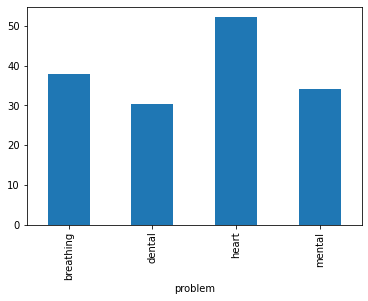

In [303]:
dfx.groupby("problem")['age'].mean().plot(kind='bar')

<AxesSubplot:xlabel='problem'>

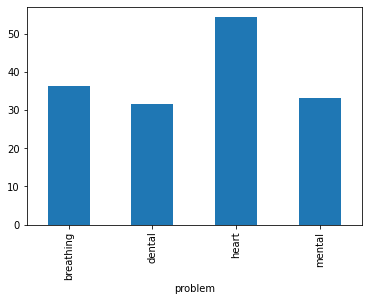

In [304]:
dfy.groupby("problem")['age'].mean().plot(kind='bar')

<AxesSubplot:xlabel='problem'>

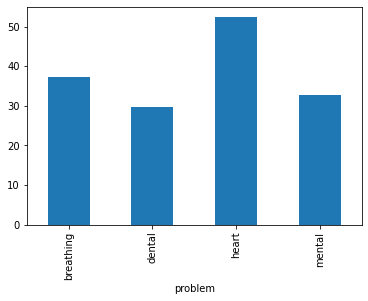

In [305]:
dfo.groupby("problem")['age'].mean().plot(kind='bar')

In [306]:
dfx['wage'] = dfx['wage'].apply(laplaceMechanism, args=(0.5,))
dfy['wage'] = dfy['wage'].apply(laplaceMechanism, args=(0.5,))

<AxesSubplot:xlabel='insured'>

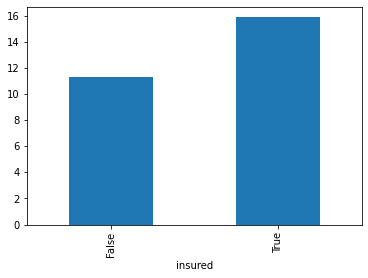

In [307]:
dfx.groupby("insured")['wage'].mean().plot(kind='bar')

<AxesSubplot:xlabel='insured'>

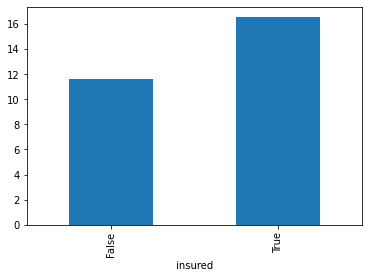

In [308]:
dfy.groupby("insured")['wage'].mean().plot(kind='bar')

<AxesSubplot:xlabel='insured'>

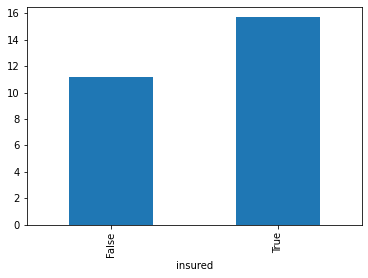

In [309]:
dfo.groupby("insured")['wage'].mean().plot(kind='bar')

In [310]:
epsilons = np.logspace(-2,1,25)
print(epsilons)
df_original = pd.read_csv("healthdata.csv")

[ 0.01        0.01333521  0.01778279  0.02371374  0.03162278  0.04216965
  0.05623413  0.07498942  0.1         0.13335214  0.17782794  0.23713737
  0.31622777  0.4216965   0.56234133  0.74989421  1.          1.33352143
  1.77827941  2.37137371  3.16227766  4.21696503  5.62341325  7.49894209
 10.        ]


In [311]:
laplace_rmse = []
laplace_mape = []
for epsilon in epsilons:
    df_private = pd.read_csv("healthdata.csv")
    df_private['wage'] = df_private['wage'].apply(laplaceMechanism, args=(epsilon,))
    laplace_rmse.append(mean_squared_error(df_original['wage'].to_numpy().tolist(), 
                df_private['wage'].to_numpy().tolist(), squared=False))
    laplace_mape.append(mean_absolute_percentage_error(df_original['wage'].to_numpy().tolist(), 
                df_private['wage'].to_numpy().tolist()))

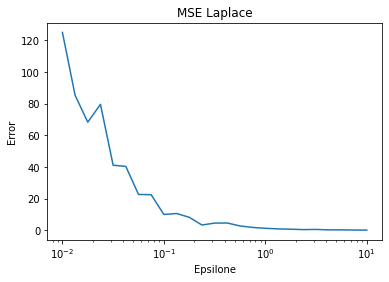

In [312]:
plt.semilogx(epsilons, laplace_rmse)
plt.xlabel('Epsilone')
plt.ylabel('Error')
plt.title("MSE Laplace")
plt.show()

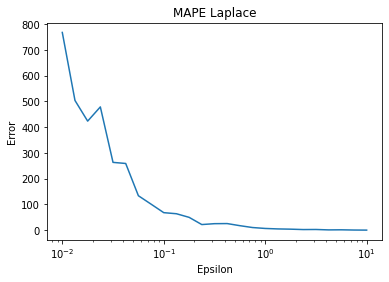

In [313]:
plt.semilogx(epsilons, laplace_mape)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Laplace")
plt.show()

In [314]:
gaussian_mse = []
gaussian_mape = []
for epsilon in epsilons:
    df_private = pd.read_csv("healthdata.csv")
    df_private['wage'] = df_private['wage'].apply(gaussianMechanism, args=(epsilon,))
    gaussian_mse.append(mean_squared_error(df_original['wage'], 
                df_private['wage'].to_numpy().tolist(), squared=False))
    gaussian_mape.append(mean_absolute_percentage_error(df_original['wage'].to_numpy().tolist(), 
                df_private['wage'].to_numpy().tolist()))

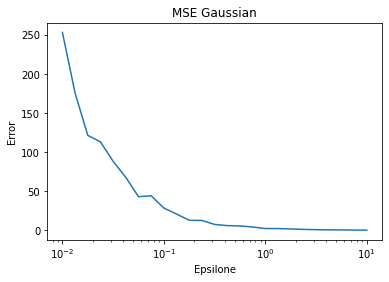

In [315]:
plt.semilogx(epsilons, gaussian_mse)
plt.xlabel('Epsilone')
plt.ylabel('Error')
plt.title("MSE Gaussian")
plt.show()

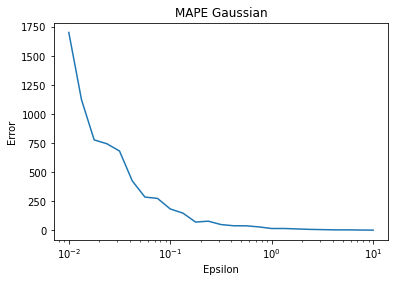

In [316]:
plt.semilogx(epsilons, gaussian_mape)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Gaussian")
plt.show()